Diplomado en Ciencia de Datos con Python

Universidad Autónoma del Estado de México [UAEM]

Modulo I.

PRÁCTICA FINAL: **ANÁLISIS FINANCIERO** 

LIZ ILEANA RODRÍGUEZ GÁMEZ

-------------------------------------------

# Introducción al proyecto.

**Objetivo:**

Organizar un set de datos las empresas mineras que operan en Sonora, México, para hacer una analisis exploratorio del desempeño de estas y el precio de los metales. 

# Sección 1. Iniciando con el proyecto. 

Se importan las librerias a utilizar. 

En el caso de la API de Yahoo financials consultese [aquí](https://pypi.org/project/yfinance/). 

In [166]:
# SE IMPORTAN LAS LIBRERIAS NECESARIAS

# Manipulacion de datos 
import numpy as np
import pandas as pd
import datetime
import math
import json

# API de Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
!pip install yahoofinancials
!pip install yahooquery

import yfinance as yf
from yahoofinancials import YahooFinancials
from pandas_datareader import data
from yahooquery import Ticker

# Visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
yf.version.version

'0.2.14'

# Sección 2. Obtener información.

Se obtiene la información de los precios (ajustado al cierre del día) en el mercado internacional a través de [Yahoo Finance](https://finance.yahoo.com/). Previamente necesitamos indagar sobre el nombre técnico de la materia prima o de la empresa que utiliza Yahoo! Aquí la lista de los simbolos de metrales y empresas mineras son los cuales se trabajará en este proyecto. 

*Tickets de los metales:*

**GC=F** Simbolo para precio del oro, dólares por USD/Oz.

**SI=F** Simbolo para precio de la plata, USD/Oz.

**HG=F** Simbolo para precio de cobre, USD/lb.

*Tickets de empresas mineras:*

**AG** = First Majestic Silver Corp / NYSE - Nasdaq Real Time Price. Currency in USD

**ARNGF** = Argonaut Gold Inc. / Other OTC - Other OTC Delayed Price. Currency in USD

**AGI** = Alamos Gold Inc. / NYSE - Nasdaq Real Time Price. Currency in USD

**AEM** = Agnico Eagle Mines Limited / NYSE - Nasdaq Real Time Price. Currency in USD

**SCCO** = Southern Copper Corporation / NYSE - Nasdaq Real Time Price. Currency in USD

**GMBXF** = Grupo México, S.A.B. de C.V. / Other OTC - Other OTC Delayed Price. Currency in USD

**IPOAF** = Industrias Peñoles, S.A.B. de C.V.  / Other OTC - Other OTC Delayed Price. Currency in USD

**FNLPF** = Fresnillo plc / Other OTC - Other OTC Delayed Price. Currency in USD

**MFRVF** = Minera Frisco, S.A.B. de C.V. / Other OTC Delayed Price. Currency in USD / Cierre de cotizaciones 23/02/2023. Disponible en https://www.nasdaq.com/es/market-activity/stocks/mfrvf/historical 

GMEXICOB.MX = Grupo México, S.A.B. de C.V. / Mexico - Mexico Delayed Price. Currency in MXN

AUTLANB.MX = Compañía Minera Autlán, S.A.B. de C.V. / Mexico - Mexico Delayed Price. Currency in MXN

PE&OLES.MX = Industrias Peñoles, S.A.B. de C.V. / Mexico - Mexico Delayed Price. Currency in MXN

MFRISCOA-1.MX = Minera Frisco, S.A.B. de C.V. / Mexico - Mexico Delayed Price. Currency in MXN


## 2.1. Explorando la libreria de *Yahoo Finance*

In [168]:
# EXPLORANDO LA LIBRERIA DE YAHOO FINANCE 

start= datetime.datetime(2020,1,1)         # formato (YYYY,M,D)
end = datetime.datetime(2022,12,31)

# Tomando como ejemplo el oro (GC=F) obtenemos la información 
oro = yf.download('GC=F', start=start, end=end, interval='1d')
oro



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214
2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107
2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416
2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47
2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236
...,...,...,...,...,...,...
2022-12-23,1794.300049,1802.800049,1794.099976,1795.900024,1795.900024,49
2022-12-27,1803.400024,1826.300049,1803.400024,1814.800049,1814.800049,69
2022-12-28,1803.199951,1807.900024,1803.099976,1807.900024,1807.900024,434


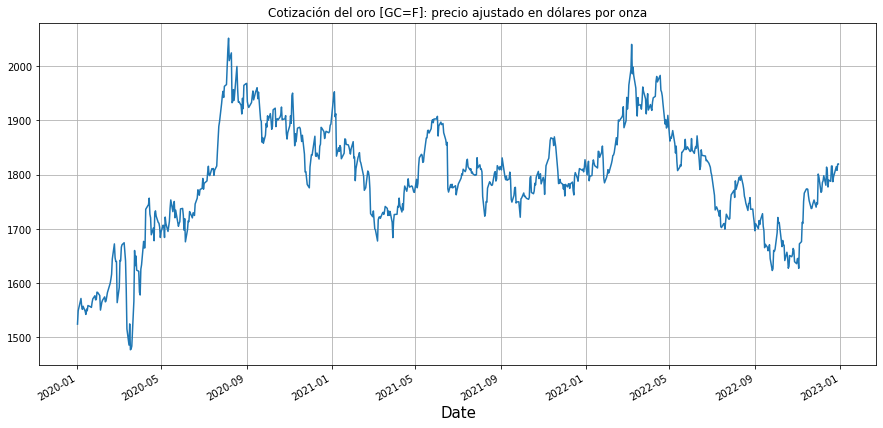

In [169]:
# Graficando la información

oro['Adj Close'].plot(grid=True, figsize = (15,7))
plt.title('Cotización del oro [GC=F]: precio ajustado en dólares por onza')
plt.show()

In [170]:
# Obtener información a través de una lista de simbolos (). 
"""
1. Definir la lista de simbolos de los que se quiere extraer la información.
2. Establecer fechas de inicio y fin del periodo para el cual se extrae la información.
3. Hacer la consulta a yf dentro de un ciclo que permita:
  a) Extraer la información histórica
  b) Considerar los parametros de inicio y fin del periodo e intervalos diario 
  c) Obtener solo la informacion del precio de cierre ('Close'), que es la información de interes. 
4. Almacenar dicha información en una serie que tendrá el nombre del símbolo.
5. Finalmente concatenar las series a través de los indices de fecha, 
   con lo cual aseguramos que los precios hagan match con las fechas para las cuales hay información, 
   de lo contrario tenemos NaN, ya que no todos los dias se realizan contizaciones en bolsa para cada simbolo. 
   """

ticker_list = ['GC=F', 'SI=F', 'HG=F', 'AG', 'ARNGF', 'AGI', 'AEM', 'SCCO', 'GMBXF', 'IPOAF', 'FNLPF', 'MFRVF', 'GMEXICOB.MX' , 'PE&OLES.MX', 'AUTLANB.MX', 'MFRISCOA-1.MX']
start = datetime.datetime(2020,1,1)         # formato (YYYY,MM,DD)
end = datetime.datetime(2023,1,1)

ticker = yf.download(ticker_list, start=start, end=end)['Adj Close']
ticker.head() 


[*********************100%***********************]  16 of 16 completed


,AEM,AG,AGI,ARNGF,AUTLANB.MX,FNLPF,GC=F,GMBXF,GMEXICOB.MX,HG=F,IPOAF,MFRISCOA-1.MX,MFRVF,PE&OLES.MX,SCCO,SI=F
Date,,,,,,,,,,,,,,,,
2020-01-02,56.119659,12.162876,5.714912,1.52,9.010559,8.059931,1524.500000,2.694918,44.552372,2.8330,10.301102,3.15,0.16,206.533569,36.407162,17.966000
2020-01-03,56.221172,11.914045,5.647450,1.51,8.972011,8.173317,1549.199951,2.803109,44.659687,2.7985,10.845871,3.37,0.16,210.751602,35.418346,18.068001
2020-01-06,56.285778,11.595538,5.628177,1.56,8.981647,8.296153,1566.199951,2.753932,43.607170,2.8005,10.845871,3.69,0.16,212.450806,35.478016,18.097000
2020-01-07,56.737980,11.894137,5.666726,1.69,8.914189,8.201664,1571.800049,2.753932,43.702099,2.8040,11.043969,3.59,0.16,212.130951,35.529167,18.316000
2020-01-08,54.643063,11.127738,5.425794,1.64,8.769634,8.059931,1557.400024,2.724425,44.874321,2.8190,11.043969,3.51,0.16,209.901993,35.733749,18.087999


In [171]:
# Tipo de variables
ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 777 entries, 2020-01-02 to 2022-12-30
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AEM            756 non-null    float64
 1   AG             756 non-null    float64
 2   AGI            756 non-null    float64
 3   ARNGF          756 non-null    float64
 4   AUTLANB.MX     757 non-null    float64
 5   FNLPF          756 non-null    float64
 6   GC=F           757 non-null    float64
 7   GMBXF          756 non-null    float64
 8   GMEXICOB.MX    757 non-null    float64
 9   HG=F           758 non-null    float64
 10  IPOAF          756 non-null    float64
 11  MFRISCOA-1.MX  757 non-null    float64
 12  MFRVF          756 non-null    float64
 13  PE&OLES.MX     757 non-null    float64
 14  SCCO           756 non-null    float64
 15  SI=F           756 non-null    float64
dtypes: float64(16)
memory usage: 103.2 KB


## 2.2. verificar valores nulos y su tratamiento

In [172]:
ticker.isnull()

,AEM,AG,AGI,ARNGF,AUTLANB.MX,FNLPF,GC=F,GMBXF,GMEXICOB.MX,HG=F,IPOAF,MFRISCOA-1.MX,MFRVF,PE&OLES.MX,SCCO,SI=F
Date,,,,,,,,,,,,,,,,
2020-01-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,True,True,True,True,False,True,True,True,False,True,True,False,True,False,True,True
2022-12-27,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-12-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [173]:
ticker.isnull().sum()

AEM              21
AG               21
AGI              21
ARNGF            21
AUTLANB.MX       20
FNLPF            21
GC=F             20
GMBXF            21
GMEXICOB.MX      20
HG=F             19
IPOAF            21
MFRISCOA-1.MX    20
MFRVF            21
PE&OLES.MX       20
SCCO             21
SI=F             21
dtype: int64

In [176]:
# Remplazar los NaN por el anterior valor valido.
ticker = ticker.fillna(method='bfill')
ticker.head()

,AEM,AG,AGI,ARNGF,AUTLANB.MX,FNLPF,GC=F,GMBXF,GMEXICOB.MX,HG=F,IPOAF,MFRISCOA-1.MX,MFRVF,PE&OLES.MX,SCCO,SI=F
Date,,,,,,,,,,,,,,,,
2020-01-02,56.119659,12.162876,5.714912,1.52,9.010559,8.059931,1524.500000,2.694918,44.552372,2.8330,10.301102,3.15,0.16,206.533569,36.407162,17.966000
2020-01-03,56.221172,11.914045,5.647450,1.51,8.972011,8.173317,1549.199951,2.803109,44.659687,2.7985,10.845871,3.37,0.16,210.751602,35.418346,18.068001
2020-01-06,56.285778,11.595538,5.628177,1.56,8.981647,8.296153,1566.199951,2.753932,43.607170,2.8005,10.845871,3.69,0.16,212.450806,35.478016,18.097000
2020-01-07,56.737980,11.894137,5.666726,1.69,8.914189,8.201664,1571.800049,2.753932,43.702099,2.8040,11.043969,3.59,0.16,212.130951,35.529167,18.316000
2020-01-08,54.643063,11.127738,5.425794,1.64,8.769634,8.059931,1557.400024,2.724425,44.874321,2.8190,11.043969,3.51,0.16,209.901993,35.733749,18.087999


In [177]:
ticker.isnull().sum()

AEM              0
AG               0
AGI              0
ARNGF            0
AUTLANB.MX       0
FNLPF            0
GC=F             0
GMBXF            0
GMEXICOB.MX      0
HG=F             0
IPOAF            0
MFRISCOA-1.MX    0
MFRVF            0
PE&OLES.MX       0
SCCO             0
SI=F             0
dtype: int64

## 2.3. Homogeneizar monedas 

Dado que estamos utilizando cotizaciones de empresas mineras tanto en la Bolsa de Valores de México y en la de Nueva York podriamos tener diferentes monedas. 

In [178]:
# Obtener información del tipo de cambio para realizar la conversion de las acciones cotizadas en pesos a dólar norteamericano (USD)
# El símbolo de Yahoo Finance es USDMXN=X ....  la cariable objetivo es el precio de cierre ajustado ('Adj Close')

tipo_cambio = yf.download('USDMXN=X', start=start, end=end, interval='1d')
tipo_cambio.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,18.917400,18.917801,18.917400,18.917400,18.917400,0
2020-01-02,18.905251,18.923429,18.842400,18.898800,18.898800,0
2020-01-03,18.830799,19.024549,18.816601,18.830299,18.830299,0
2020-01-06,18.945150,18.946400,18.786600,18.944759,18.944759,0
2020-01-07,18.843500,18.926081,18.790100,18.841450,18.841450,0


In [179]:
# Unir la info de tipo de cambio ('Adj Close') con los precios de acciones/metales
ticker = ticker.merge(tipo_cambio['Adj Close'], how="inner", on="Date")

#renombrar la columna 
ticker.rename(columns={'Adj Close':'MXN/USD'}, inplace=True)
ticker.head(3)

,AEM,AG,AGI,ARNGF,AUTLANB.MX,FNLPF,GC=F,GMBXF,GMEXICOB.MX,HG=F,IPOAF,MFRISCOA-1.MX,MFRVF,PE&OLES.MX,SCCO,SI=F,MXN/USD
Date,,,,,,,,,,,,,,,,,
2020-01-02,56.119659,12.162876,5.714912,1.52,9.010559,8.059931,1524.500000,2.694918,44.552372,2.8330,10.301102,3.15,0.16,206.533569,36.407162,17.966000,18.898800
2020-01-03,56.221172,11.914045,5.647450,1.51,8.972011,8.173317,1549.199951,2.803109,44.659687,2.7985,10.845871,3.37,0.16,210.751602,35.418346,18.068001,18.830299
2020-01-06,56.285778,11.595538,5.628177,1.56,8.981647,8.296153,1566.199951,2.753932,43.607170,2.8005,10.845871,3.69,0.16,212.450806,35.478016,18.097000,18.944759


In [180]:
#Convertir pesos a dólares en caso de que la acción la empresa cotiza en pesos y por tanto en la Bolsa Mexicana de Valores ('bmv').

bmv=ticker[['GMEXICOB.MX','PE&OLES.MX', 'AUTLANB.MX', 'MFRISCOA-1.MX']]
ticker = ticker.apply(lambda x: x/ticker['MXN/USD'] if x.name in bmv else x, axis=0)
ticker.head(3)

,AEM,AG,AGI,ARNGF,AUTLANB.MX,FNLPF,GC=F,GMBXF,GMEXICOB.MX,HG=F,IPOAF,MFRISCOA-1.MX,MFRVF,PE&OLES.MX,SCCO,SI=F,MXN/USD
Date,,,,,,,,,,,,,,,,,
2020-01-02,56.119659,12.162876,5.714912,1.52,0.476779,8.059931,1524.500000,2.694918,2.357418,2.8330,10.301102,0.166677,0.16,10.928396,36.407162,17.966000,18.898800
2020-01-03,56.221172,11.914045,5.647450,1.51,0.476467,8.173317,1549.199951,2.803109,2.371693,2.7985,10.845871,0.178967,0.16,11.192154,35.418346,18.068001,18.830299
2020-01-06,56.285778,11.595538,5.628177,1.56,0.474097,8.296153,1566.199951,2.753932,2.301806,2.8005,10.845871,0.194777,0.16,11.214226,35.478016,18.097000,18.944759


# Sección 3. Análisis Exploratorio de Datos [EDA]. 

El EDA es un enfoque para analizar conjuntos de datos para resumir sus características principales, a menudo con métodos visuales. En este caso vamos a visualizar y analizar los datos de los precios de las acciones selecionadas e intentar encontrar información relevante. 

In [181]:
ticker.describe()

,AEM,AG,AGI,ARNGF,AUTLANB.MX,FNLPF,GC=F,GMBXF,GMEXICOB.MX,HG=F,IPOAF,MFRISCOA-1.MX,MFRVF,PE&OLES.MX,SCCO,SI=F,MXN/USD
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,55.699894,11.221949,7.838954,1.604543,0.592210,10.913047,1790.166408,3.826745,3.524461,3.684699,12.459089,0.137279,0.157027,12.431648,50.892242,22.513534,20.625427
std,9.905417,3.051988,1.122286,0.760463,0.160514,2.435668,101.236864,1.032265,1.021481,0.739015,2.774661,0.045339,0.048753,2.750099,12.357508,3.595699,1.233716
min,33.687202,4.976627,3.748905,0.260000,0.271600,6.104004,1477.300049,1.524498,1.251286,2.119500,5.120836,0.048959,0.040000,5.943706,20.287764,11.735000,18.542999
25%,48.955776,8.760529,7.262965,0.980000,0.475969,8.960000,1731.199951,2.803109,2.389834,3.043500,10.449676,0.099680,0.130000,10.404591,41.412003,19.427000,19.923599
50%,54.855324,10.841754,7.739993,1.820000,0.612414,10.642793,1795.500000,4.093462,3.850727,3.729500,12.700000,0.139485,0.160000,12.641518,54.039150,23.292000,20.252251
75%,61.490028,13.011589,8.484477,2.150000,0.731722,12.214875,1857.099976,4.604398,4.211385,4.330000,14.362113,0.172727,0.190000,14.247484,60.156830,25.257000,20.912001
max,80.569382,22.016598,11.118223,3.170000,0.864591,16.841576,2051.500000,5.970538,5.696843,4.929000,19.314566,0.234121,0.330000,19.837835,73.476341,29.398001,25.336201


## 3.1 Exploración visual

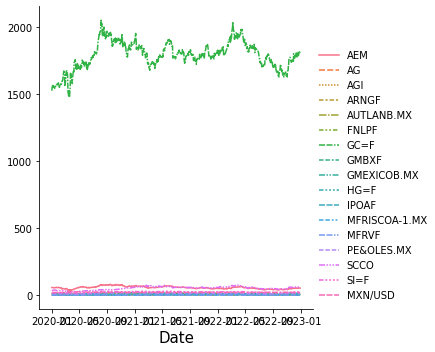

In [182]:
sns.relplot(kind="line", data=ticker)

#sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **p

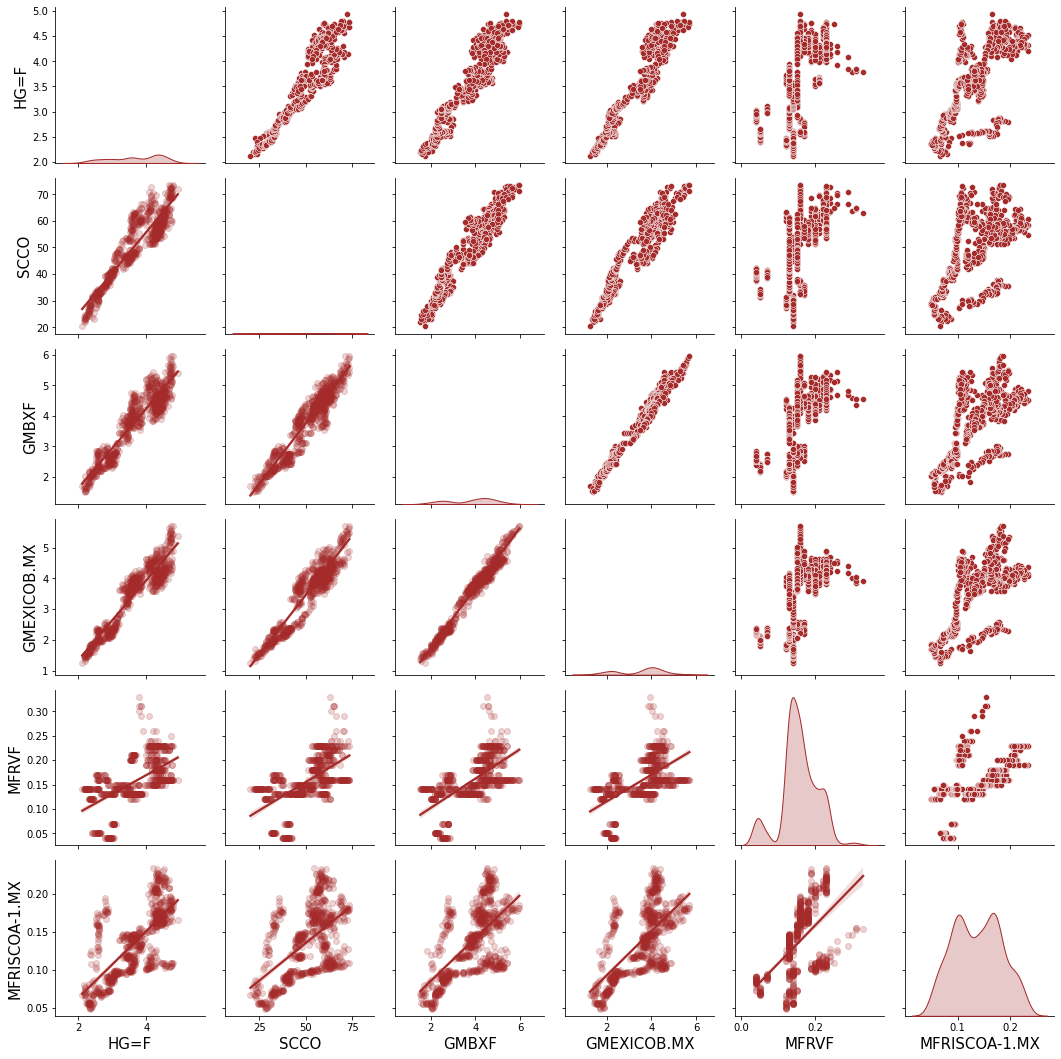

In [220]:
# Empresas mineras de cobre y precio de cobre
def my_pairgrid(ticker):
    mpl.rcParams["axes.labelsize"] = 15
    g = sns.PairGrid(ticker, vars=['HG=F', 'SCCO', 'GMBXF', 'GMEXICOB.MX', 'MFRVF', 'MFRISCOA-1.MX'] )
    g = g.map_diag(sns.kdeplot, shade=True, color='brown')
    g = g.map_lower(sns.regplot, scatter_kws={'alpha':0.2}, color='brown')
    g = g.map_upper(sns.scatterplot, color='brown')
    return(g)
_ = my_pairgrid(ticker)


## 3.2. ¿En qué acciones es más riesgoso invertir? 

La desviación estándar es la medida estadística de la volatilidad del mercado, que mide la dispersión de los precios del precio promedio. Si los precios se negocian en un rango de negociación estrecho, la desviación estándar devolverá un valor bajo que indica baja volatilidad. Por el contrario, si los precios oscilan violentamente hacia arriba y hacia abajo, la desviación estándar arroja un valor alto que indica una alta volatilidad.

¿Qué acción clasificaría como la más riesgosa durante todo el período de tiempo?

In [183]:
#Cálculo de los rendimientos (retornos) de las acciónones

returns = pd.DataFrame()
for tick in ticker_list:
    returns[tick] = ticker[tick].pct_change()       # pct_change() devuelve un DataFrame con la diferencia porcentual entre los valores de cada fila y, por defecto, la fila anterior.
     
returns.head(3)


,GC=F,SI=F,HG=F,AG,ARNGF,AGI,AEM,SCCO,GMBXF,IPOAF,FNLPF,MFRVF,GMEXICOB.MX,PE&OLES.MX,AUTLANB.MX,MFRISCOA-1.MX
Date,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.016202,0.005677,-0.012178,-0.020458,-0.006579,-0.011804,0.001809,-0.027160,0.040146,0.052885,0.014068,0.0,0.006055,0.024135,-0.000656,0.073733
2020-01-06,0.010973,0.001605,0.000715,-0.026734,0.033113,-0.003413,0.001149,0.001685,-0.017544,0.000000,0.015029,0.0,-0.029467,0.001972,-0.004974,0.088340


In [221]:
# Gráficando los retornos

sns.pairplot(returns[1:])

Output hidden; open in https://colab.research.google.com to view.

In [185]:
# Mayores pérdidas de un solo día.
returns.idxmin()

GC=F            2020-11-09
SI=F            2020-03-16
HG=F            2020-03-18
AG              2021-02-02
ARNGF           2022-05-12
AGI             2020-03-13
AEM             2020-02-14
SCCO            2020-03-12
GMBXF           2020-03-30
IPOAF           2020-03-17
FNLPF           2020-11-09
MFRVF           2020-07-22
GMEXICOB.MX     2020-03-09
PE&OLES.MX      2020-03-09
AUTLANB.MX      2020-03-09
MFRISCOA-1.MX   2020-05-01
dtype: datetime64[ns]

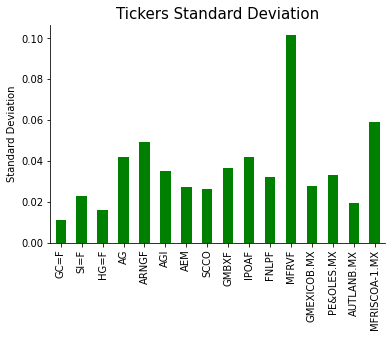

In [186]:
# En cuáles acción es más riesgoso invertir

returns.std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation', fontsize=10)
plt.title('Tickers Standard Deviation', fontsize=15)
sns.despine()

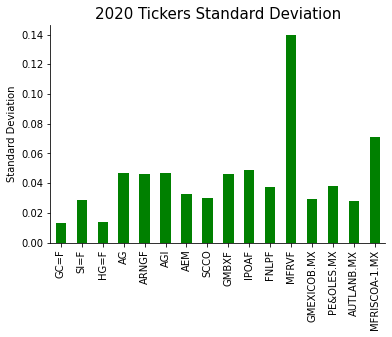

In [187]:
# Las más riesgosas para el año 2020

returns.loc['2020-01-01':'2020-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation', fontsize=10)
plt.title('2020 Tickers Standard Deviation', fontsize=15)
sns.despine()

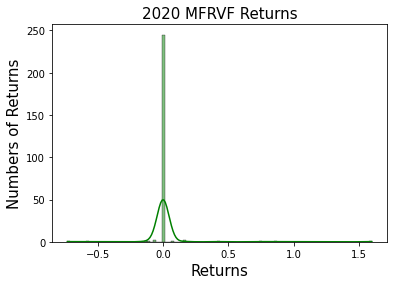

In [188]:
#Histograma de la más riesgosa 

#plt.figure(figsize=(8,8))
ax = sns.histplot(returns.loc['2020-01-01':'2020-12-31']['MFRVF'], color='green', bins=100, kde=True)
ax.set_title('2020 MFRVF Returns', fontsize=15)
ax.set_xlabel('Returns', fontsize=15)
ax.set_ylabel('Numbers of Returns', fontsize=15)
plt.show()

## 3.3. Matriz de correlación

Usamos el coeficiente de correlación de Pearson para examinar la fuerza y dirección de la relación lineal entre dos variables continuas. El coeficiente puede variar de -1 a +1, cuanto mayor sea el valor absoluto, más fuerte es la relación entre variables, un valor de cero indica que no hay relación. El signo del coeficiente indica la dirección de la relación.

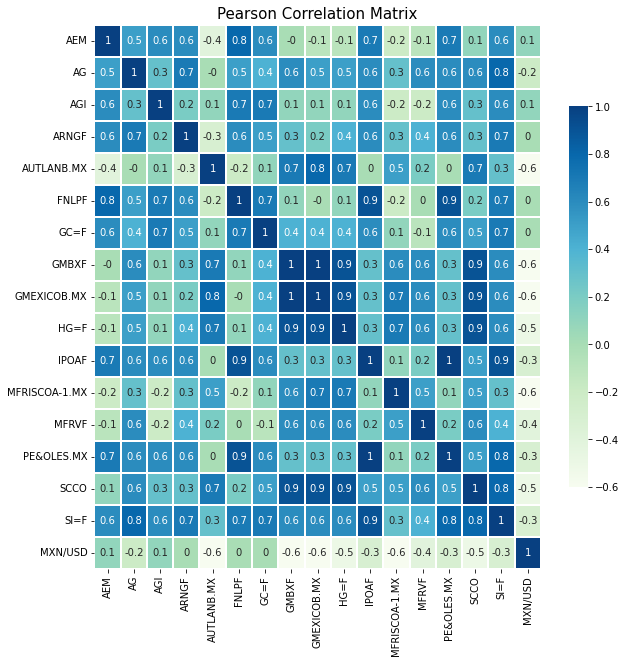

In [204]:
#Mapa de calor de la correlación entre el precio de cierre de las acciones.

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation Matrix', fontsize=15)
sns.heatmap(ticker.corr().round(1), annot=True, cmap='GnBu',
            linewidths=0.25, linecolor='w', cbar_kws={"shrink": .7})
plt.show()

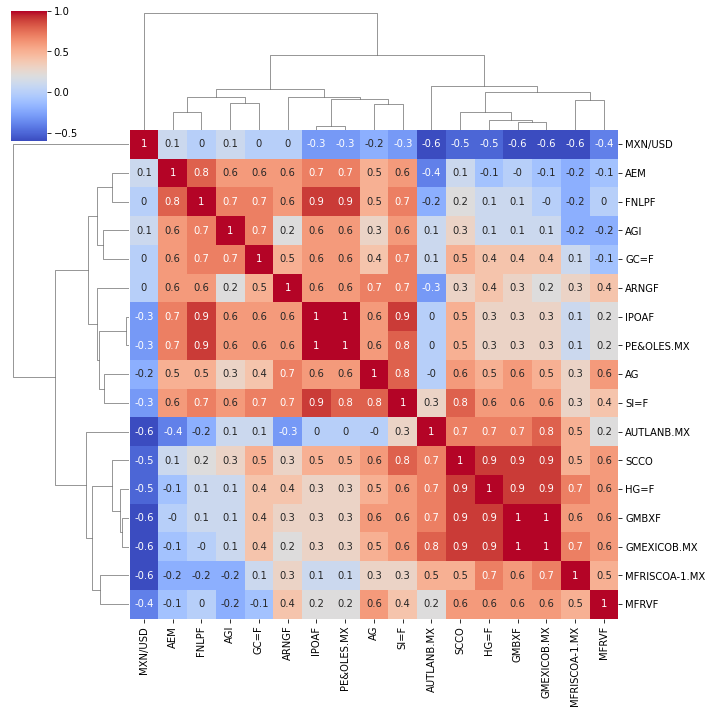

In [205]:
# Ahora un análisis de cluster

sns.clustermap(ticker.corr().round(1), annot=True, cmap='coolwarm')

In [206]:
#En base a las correlaciones anteriores podemos (re)agrupar las acciones para su análisis.
plata= ['SI=F', 'AEM', 'AGI', 'AG', 'ARNGF', 'IPOAF', 'FNLPF', 'PE&OLES.MX']
cobre=['HG=F', 'SCCO', 'GMBXF', 'MFRVF', 'GMEXICOB.MX', 'AUTLANB.MX', 'MFRISCOA-1.MX'   ]

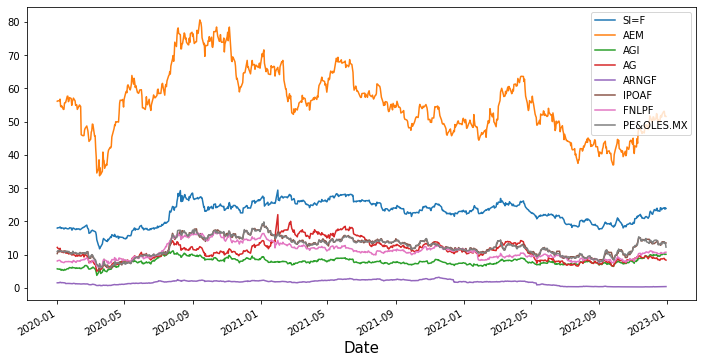

In [207]:
#Análisis de plata

for tick in plata:
    ticker[tick].plot(label=tick, figsize=(12,6))
plt.legend()

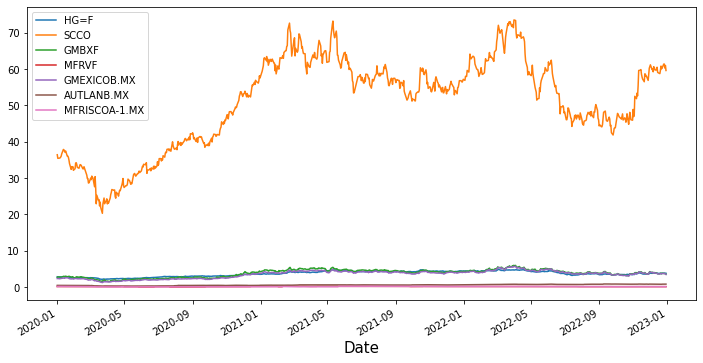

In [208]:
#Análisis del cobre

for tick in cobre:
    ticker[tick].plot(label=tick, figsize=(12,6))
plt.legend()

##3.4. El promedio móvil (MA) 

MA es una herramienta de análisis que suaviza los datos de precios al crear un precio promedio constantemente actualizado. El promedio se toma durante una ventana de tiempo (*e.g.* 10 días, 20 minutos, etc.). El MA se utiliza para averiguar la dirección de la tendencia de los precios.


Por ejemplo: *¿Cuál es el promedio móvil de 30 días contra el precio de cierre de las acciones en el año 2022?*


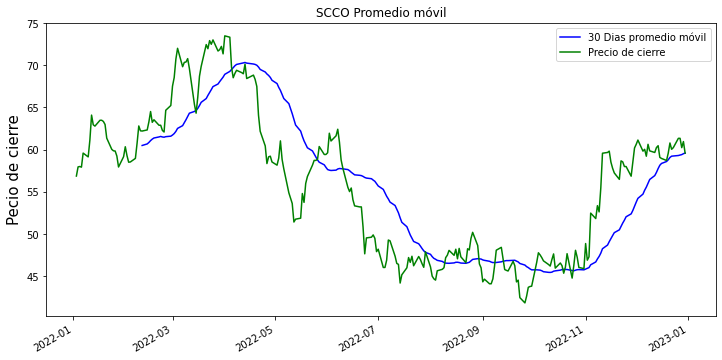

In [209]:
plt.figure(figsize=(12,6))
ticker['SCCO'].loc['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(color='blue', label='30 Dias promedio móvil')
ticker['SCCO'].loc['2022-01-01':'2022-12-31'].plot(color='green', label='Precio de cierre')
plt.ylabel('Pecio de cierre')
plt.xlabel('')
plt.title('SCCO Promedio móvil')
plt.legend()
plt.show()

# Sección 4. Simulación Montecarlo

La [Simulación Montecarlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo)​ es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. Dado que se usa para estimar la probabilidad de ocurrencia de un evento indeterminable debido a la participación de variables aleatorias, el método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. 

[Aplicaciones](https://https://www.sdelsol.com/glosario/simulacion-de-montecarlo/#:~:text=Utilidad%20de%20la%20simulaci%C3%B3n%20de,dado%20uso%20a%20esta%20simulaci%C3%B3n) comunes en finanzas:

* A la hora de llevar a cabo grandes proyectos por parte de las empresas, ayuda a generar diferentes escenarios que se podrían producir en función de los costes y plazos del proyecto.
* Para crear y estudiar el comportamiento de opciones financieras o carteras de inversión.
* En muchas ocasiones también se utiliza para gestionar el riesgo en las inversiones.

In [210]:
"""
# ENTRADAS PARA LA SIMULACIÓN

number_of_trading_days = 252

number_of_trials = 10000
"""

'\n# ENTRADAS PARA LA SIMULACIÓN\n\nnumber_of_trading_days = 252\n\nnumber_of_trials = 10000\n'

In [211]:
"""
#Ahora que hemos creado una sola caminata aleatoria arriba, podemos simular este proceso en un tamaño de muestra grande para tener una mejor idea de la verdadera distribución esperada

#calcular porcentajes de retorno aleatorios siguiendo nuestra distribución normal
#y usando la desviación media/estándar 

total_growth = (precios_df['SCCO'][-1] / precios_df['SCCO'][0])
time_elapsed = (precios_df.index[-1] - precios_df.index[0]).days
number_of_years = time_elapsed / 365.0
agrowth = total_growth ** (1/number_of_years) - 1            # tasa de crecimiento media aual

std_dev = precios_df['SCCO'].pct_change().std()              #desviación de los cambios de precios
std_dev = std_dev * math.sqrt(number_of_trading_days)

media=agrowth/number_of_trading_days
desviacion = std_dev/math.sqrt(number_of_trading_days)

closing_prices = []    # matriz que recopilar todos los precios de cierre posibles en el último día de la ventana

#Generar valores aleatorios para 1 año de negociación (252 días)

for i in range(number_of_trials): 
    #daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days), number_of_trading_days)+1
    daily_return_percentages = np.random.normal(media, desviacion, number_of_trading_days)+1

    price_series = [precios_df['SCCO'][-1]]

    for j in daily_return_percentages:      #extrapola el precio para el próximo año
        price_series.append(price_series[-1] * j)

    closing_prices.append(price_series[-1])    #agregar precios de cierre en el último día de la ventana para el histograma
 
    #Trazar los paseos aleatorios
    plt.plot(price_series)
    plt.title("Simulación Montecarlo")
    plt.xlabel('Dia')
    plt.ylabel('Precio de cierre (US$)')

plt.show()
"""

'\n#Ahora que hemos creado una sola caminata aleatoria arriba, podemos simular este proceso en un tamaño de muestra grande para tener una mejor idea de la verdadera distribución esperada\n\n#calcular porcentajes de retorno aleatorios siguiendo nuestra distribución normal\n#y usando la desviación media/estándar \n\ntotal_growth = (precios_df[\'SCCO\'][-1] / precios_df[\'SCCO\'][0])\ntime_elapsed = (precios_df.index[-1] - precios_df.index[0]).days\nnumber_of_years = time_elapsed / 365.0\nagrowth = total_growth ** (1/number_of_years) - 1            # tasa de crecimiento media aual\n\nstd_dev = precios_df[\'SCCO\'].pct_change().std()              #desviación de los cambios de precios\nstd_dev = std_dev * math.sqrt(number_of_trading_days)\n\nmedia=agrowth/number_of_trading_days\ndesviacion = std_dev/math.sqrt(number_of_trading_days)\n\nclosing_prices = []    # matriz que recopilar todos los precios de cierre posibles en el último día de la ventana\n\n#Generar valores aleatorios para 1 año d

In [212]:
"""
#por último, podemos dividir la distribución en percentiles
#para ayudarnos a evaluar el riesgo frente a la recompensa

mean_end_price = np.mean(closing_prices)
print("Precio esperado (al cierre del año): $", mean_end_price.round(3))
print("Precio actual (último día observado): $",precios_df['SCCO'][-1].round(3))

#Extraiga el 5 % superior de los resultados posibles
top_ten = np.percentile(closing_prices, 95)
print("El limite superior (5%) es: $", top_ten.round(3))

#Extraiga el 5 % inferior de los resultados posibles
bottom_ten = np.percentile(closing_prices, 5)
print("El limite inferior (5%) es: $", bottom_ten.round(3))

#crear histograma de nuevo

fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data=closing_prices, bins=50, kde=True, color='green', ax=ax)

ax.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)                            # agregar la línea del 5 % superior
ax.axvline(bottom_ten,color='orange',linestyle='dashed',linewidth=2)                    # agregar la línea del 5 % inferior
ax.axvline(precios_df['SCCO'][-1],color='black', linestyle='dashed',linewidth=2)        # agregar con el precio actual
ax.axvline(mean_end_price, linestyle= 'dotted', color='g', linewidth=3)                 # agregar con el precio esperado
ax.legend(['Histograma', 'Máximo', 'Minimo', 'Actual', 'Esperado'])
ax.set_title("Distribución de frecuencias de la estimación y simulación al cierre del año 2023")
ax.set_xlabel("Segmentos de precios (USD)")
ax.set_ylabel("Stock Counts")
plt.show()

"""

'\n#por último, podemos dividir la distribución en percentiles\n#para ayudarnos a evaluar el riesgo frente a la recompensa\n\nmean_end_price = np.mean(closing_prices)\nprint("Precio esperado (al cierre del año): $", mean_end_price.round(3))\nprint("Precio actual (último día observado): $",precios_df[\'SCCO\'][-1].round(3))\n\n#Extraiga el 5 % superior de los resultados posibles\ntop_ten = np.percentile(closing_prices, 95)\nprint("El limite superior (5%) es: $", top_ten.round(3))\n\n#Extraiga el 5 % inferior de los resultados posibles\nbottom_ten = np.percentile(closing_prices, 5)\nprint("El limite inferior (5%) es: $", bottom_ten.round(3))\n\n#crear histograma de nuevo\n\nfig, ax = plt.subplots(figsize=(15, 5))\nsns.histplot(data=closing_prices, bins=50, kde=True, color=\'green\', ax=ax)\n\nax.axvline(top_ten,color=\'r\',linestyle=\'dashed\',linewidth=2)                            # agregar la línea del 5 % superior\nax.axvline(bottom_ten,color=\'orange\',linestyle=\'dashed\',linewidth

In [213]:
# Crea una caminata aleatoria y la simula en base a un tamaño de muestra grande (numero de interacciones/simualciones) 
# para tener una mejor idea de la verdadera distribución esperada de los precios.

def mc (tick, trading_days, trials):
  total_growth = (tick[-1] /tick[0])
  time_elapsed = (tick.index[-1] - tick.index[0]).days
  number_of_years = time_elapsed / 365.0
  agrowth = total_growth ** (1/number_of_years) - 1            # tasa de crecimiento media aual

  std_dev = tick.pct_change().std()                             #desviación de los cambios de precios
  std_dev = std_dev * math.sqrt(trading_days)

  media=agrowth/trading_days
  desviacion = std_dev/math.sqrt(trading_days)


  closing_prices = []           #matriz que recopilar todos los precios de cierre posibles en el último día de la ventana

  for i in range(trials): 
      daily_return_percentages = np.random.normal(media, desviacion, trading_days)+1

      price_series = [tick[-1]]

      for j in daily_return_percentages:
          price_series.append(price_series[-1] * j)      #extrapola el precio para el próximo año

          closing_prices.append(price_series[-1])           #agregar precios de cierre en el último día de la ventana para el histograma
  
      #trazar todos los paseos aleatorios
      ax=sns.lineplot(price_series)
      ax.set_title(" Simulación Montecarlo para " + str(tick.name) +  " [" + str(trials) + " simulaciones]", size=12) 
      ax.set_xlabel('Dias de transacciones al año [max= ' + str(trading_days) + "]", size=10)
      ax.set_ylabel('Precio de cierre (US$)', size=10)    
  plt.show()

  #CREAR HISTOGRAMA DE LA DISTRIBUCION DE LOS PRECIOS SIMULADOS

  #para ayudarnos a evaluar el riesgo frente a la recompensa podemos dividir la distribución en percentiles
  mean_end_price = np.mean(closing_prices)          #Precio promedio
  top_ten = np.percentile(closing_prices, 95)       #Extraiga el 5 % superior de los resultados posibles
  bottom_ten = np.percentile(closing_prices, 5)     #Extraiga el 5 % inferior de los resultados posibles

  #graficar el histograma de los precios simulados
  
  fig, bx = plt.subplots()#figsize=(7, 5))
  sns.histplot(data=closing_prices, bins=50, kde=True, color='green', ax=bx)

  bx.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)                            # agregar la línea del 5 % superior
  bx.axvline(bottom_ten,color='orange',linestyle='dashed',linewidth=2)                    # agregar la línea del 5 % inferior
  bx.axvline(tick[-1],color='black', linestyle='dashed',linewidth=2)                      # agregar con el precio actual
  bx.axvline(mean_end_price, linestyle= 'dotted', color='g', linewidth=3)                 # agregar con el precio esperado
  bx.legend(['Hist. precios simulados de '+ str(tick.name) , 
            'Máximo: $ ' + str(top_ten.round(1)) ,
            'Minimo: $ ' + str(bottom_ten.round(1)) ,
            'Actual: $ ' + str(tick[-1].round(1)) ,
            'Esperado: $ '+ str(mean_end_price.round(1))], fontsize='small')
  bx.set_title("Distribución de precios simulados de " + str(tick.name) + " [" + str(trials) + " simulations]", size=12)
  bx.set_xlabel("Segmentos de precios (USD)", size=10)
  bx.set_ylabel("Frecuencias", size=10)
  plt.show()


## Ejericio de simulación #1

*Ahora simularemos el precio de cierre de la acción SCCO de la empresa minera **Southern Copper Corporation**, y del precio del cobre (**HG=F**).* 

Utilizando la función mc con los siguientes parámetros:

* tick = ticker['SCCO'] ... identificar la accion en la base de datos ticker

* trading_days = 252  .... 1 año de negociaciones eqivalen a 252 días

* trials = 1000 .... numero de simulaciones 

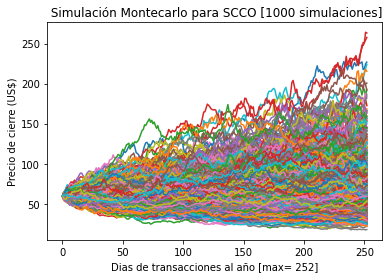

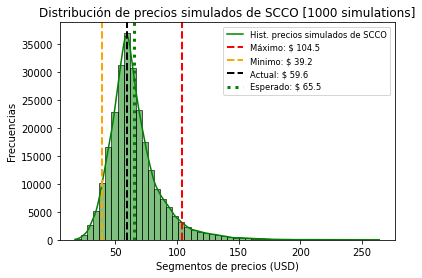

In [214]:
mc(ticker['SCCO'], 252, 1000)

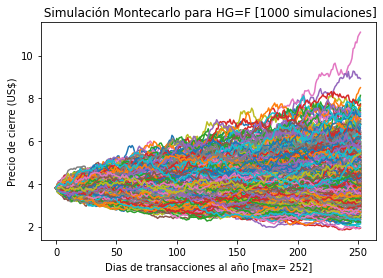

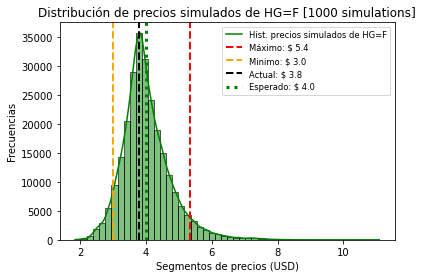

In [215]:
mc(ticker['HG=F'], 252, 1000)

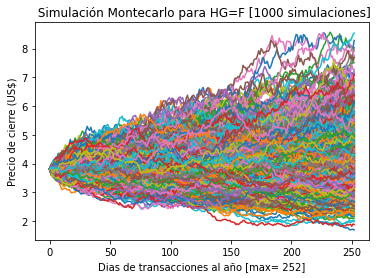

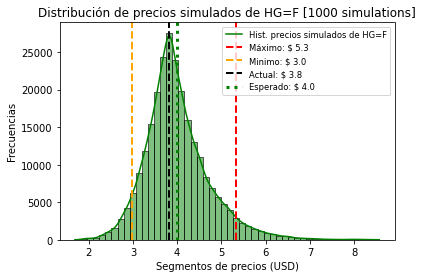

In [216]:
mc(ticker['HG=F'], 252, 1000)

## Ejericio de simulación #2

*Ahora simularemos el precio de cierre de la acción AG de la empresa minera **First Majestic Silver Corp.** y del precio de la plata (**SI=F**).*

Utilizando la función mc con los siguientes parámetros:

* tick = ticker['AG'] ... identificar la accion en la base de datos ticker 

* trading_days = 252 .... 1 año de negociaciones eqivalen a 252 días 

* trials = 1000 .... numero de simulaciones

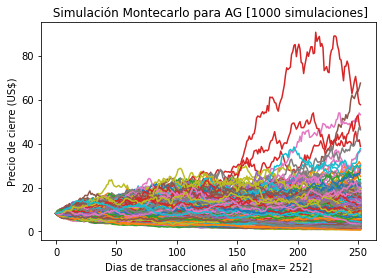

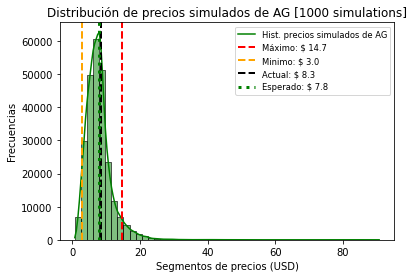

In [217]:
mc(ticker['AG'], 252, 1000)

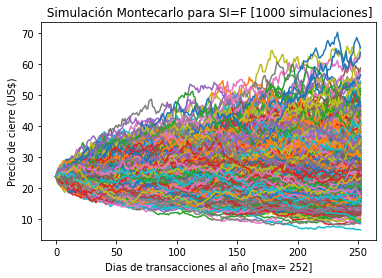

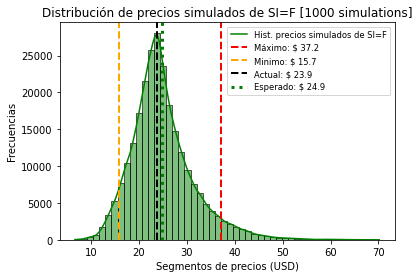

In [218]:
mc(ticker['SI=F'], 252, 1000)